In [1]:
#!pip install rasterio

In [2]:
raster_path = r'Processed Raster Satellite img 3 bands with ArcGis\mb_2.tif'

## Remove SWIR1 & SWIR2 bands

In [3]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
src = rio.open(raster_path)
ds = src.read()
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 5490,
 'height': 5490,
 'count': 10,
 'crs': CRS.from_epsg(32629),
 'transform': Affine(20.0, 0.0, 499980.0,
        0.0, -20.0, 3700020.0)}

In [5]:
ds.shape

(10, 5490, 5490)

In [6]:
ds = ds.T
ds.shape

(5490, 5490, 10)

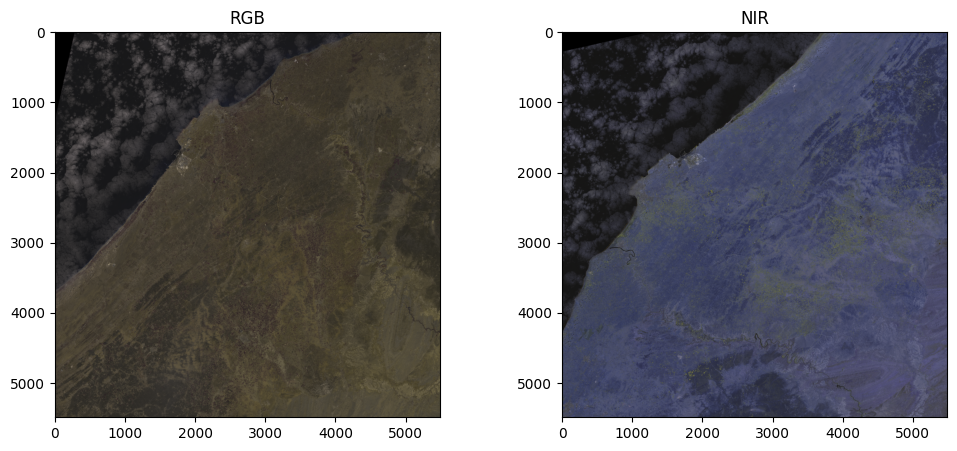

In [7]:
red = src.read(4)  # Bande 4 pour le rouge pour Sentinel-2A
green = src.read(3)  # Bande 3 pour le vert
blue = src.read(2)  # Bande 2 pour le bleu

# Empiler les bandes RGB pour l'affichage
rgb = np.stack([red, green, blue], axis=2)
#empiler pour avoir NIR (B6,B7 et B8A)
nir = np.stack([ds[:, :, 6-1],ds[:, :, 7-1],ds[:, :, 8-1]], axis=2)
#Short-Wave Infrared (B12, B8A, B4)
swir = np.stack([ds[:, :, 10-1],ds[:, :, 8-1],ds[:, :, 4-1]], axis=2)

#normalisation importante:
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())
nir = (nir - nir.min()) / (nir.max() - nir.min())
swir = (swir - swir.min()) / (swir.max() - swir.min())
#plotting
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(rgb)
ax[0].set_title('RGB')
ax[1].imshow(nir)
ax[1].set_title('NIR')
plt.show()

## Adding NDVI as new band

In [8]:
# out_meta = src.meta
# out_meta.update({'count': 7})

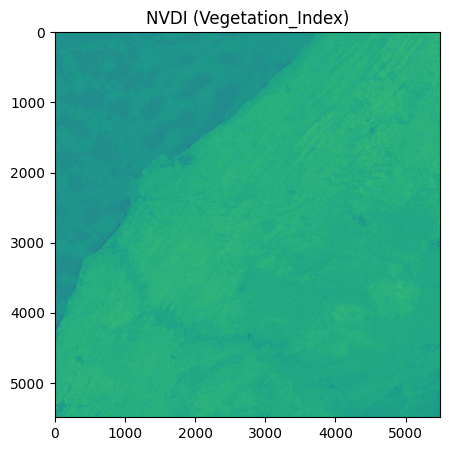

In [9]:
# Calcul du NDVI avec gestion des divisions par zéro
with np.errstate(divide='ignore', invalid='ignore'):
    ndvi = (ds[:, :, 8-1] - ds[:, :, 4-1]) / (ds[:, :, 8-1] + ds[:, :, 4-1])
    ndvi[np.isnan(ndvi)] = 0  # Remplacer les valeurs NaN par 0 (ou une autre valeur si nécessaire)
# ndvi = (ds[:, :, 8-1] - ds[:, :, 4-1]) / (ds[:, :, 8-1] + ds[:, :, 4-1])
ndvi.shape
#normalisation:
ndvi = (ndvi - ndvi.min()) / (ndvi.max() - ndvi.min())
#plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.imshow(ndvi)
ax.set_title('NVDI (Vegetation_Index)')
plt.show()

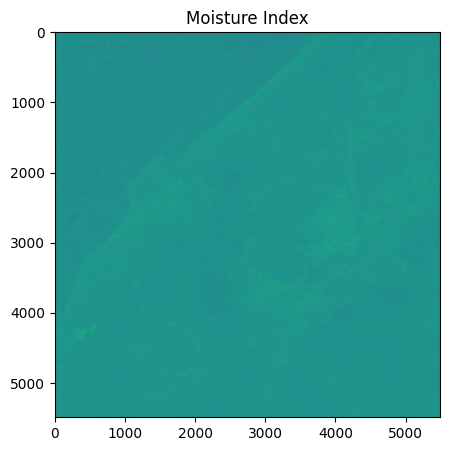

In [10]:
# Moisture Index (B8A-B11)/(B8A+B11)
#The moisture index is ideal for finding water stress in plants. It uses the short-wave and near-infrared 
# to generate an index of moisture content. In general, wetter vegetation has higher values. 
# But lower moisture index values suggest plants are under stress from insufficient moisture.

# mi = (ds[:, :, 8-1] - ds[:, :, 9-1]) / (ds[:, :, 8-1] + ds[:, :, 9-1])
with np.errstate(divide='ignore', invalid='ignore'):
    mi = (ds[:, :, 8-1] - ds[:, :, 9-1]) / (ds[:, :, 8-1] + ds[:, :, 9-1])
    mi[np.isnan(mi)] = 0  # Remplacer les valeurs NaN par 0 (ou une autre valeur si nécessaire)

#normalisation:
mi = (mi - mi.min()) / (mi.max() - mi.min())
#plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.imshow(mi)
ax.set_title('Moisture Index')
plt.show()

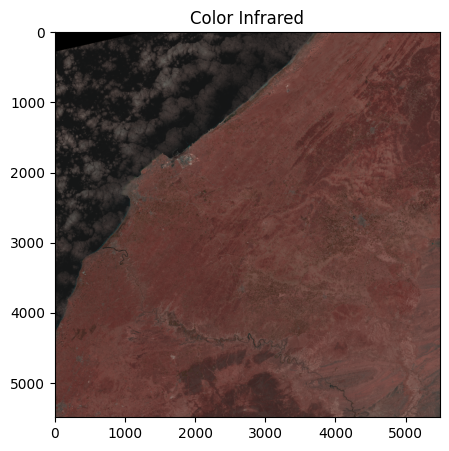

In [11]:
#Color Infrared (B8, B4, B3)
#empiler pour avoir Color Infrared (B8, B4, B3)
cir = np.stack([ds[:, :, 8-1],ds[:, :, 4-1],ds[:, :, 3-1]], axis=2)
#normalisation:
cir = (cir - cir.min()) / (cir.max() - cir.min())
#plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.imshow(cir)
ax.set_title('Color Infrared')
plt.show()

Text(0.5, 1.0, 'NDVI')

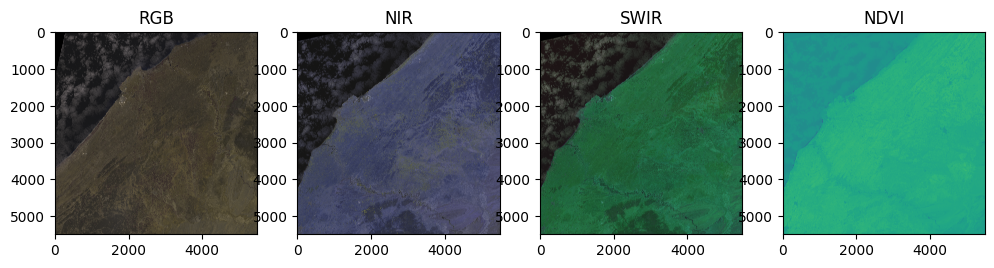

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(12,5))
ax[0].imshow(rgb)
ax[0].set_title('RGB')
ax[1].imshow(nir)
ax[1].set_title('NIR')
ax[2].imshow(swir)
ax[2].set_title('SWIR')
ax[3].imshow(ndvi)
ax[3].set_title('NDVI')
